In [1]:
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [75.1 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Pack

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My Drive/darknet

/content/drive/My Drive/darknet


In [4]:
!apt-get update > /dev/null
!apt-get upgrade > /dev/null
!apt-get install build-essential > /dev/null
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev > /dev/null
!apt-get install libopencv-dev > /dev/null
!apt-get install libavcodec-dev libavformat-dev libswscale-d > /dev/null

Extracting templates from packages: 100%
E: Unable to locate package libswscale-d


In [5]:
#%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile

!make

chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:898:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘image image_data_augmentation(mat_cv*, int, int, int, int, int, int, int, float, float, float, int, int, float*)’:
./src/image_opencv.cpp:1207:26: warning: variable ‘kernel_size’ set but not used [-Wunused-but-set-variable]
                 cv::Size kernel_size = cv::Size(ksize, ksize);
                          ^~~~~~~~~~~
g++ -std=c++1

In [0]:
#this commend used for train the dataset
#!./darknet detector train data/obj.data yolo-obj.cfg darknet53.conv.74

/bin/bash: ./darknet: No such file or directory


In [0]:
%cd content/drive/My Drive/darknet

/content/drive/My Drive/darknet


In [0]:
# for testing and seve to json
#!./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_output.weights -ext_output -dont_show -out result_plates.json < data/valid.txt

KeyboardInterrupt: ignored

In [0]:
import pandas as pd
import json
with open('result_plates.json') as file:
  data=json.load(file)

In [0]:
data=pd.DataFrame(data)

In [0]:
data.head()


,frame_id,filename,objects
0,1,data/img2/0.jpg,[]
1,2,data/img2/1.jpg,[]
2,3,data/img2/10.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
3,4,data/img2/100.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
4,5,data/img2/101.jpg,[]


In [0]:
data.tail()

,frame_id,filename,objects
137,138,data/img2/95.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
138,139,data/img2/96.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
139,140,data/img2/97.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
140,141,data/img2/98.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
141,142,data/img2/99.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."


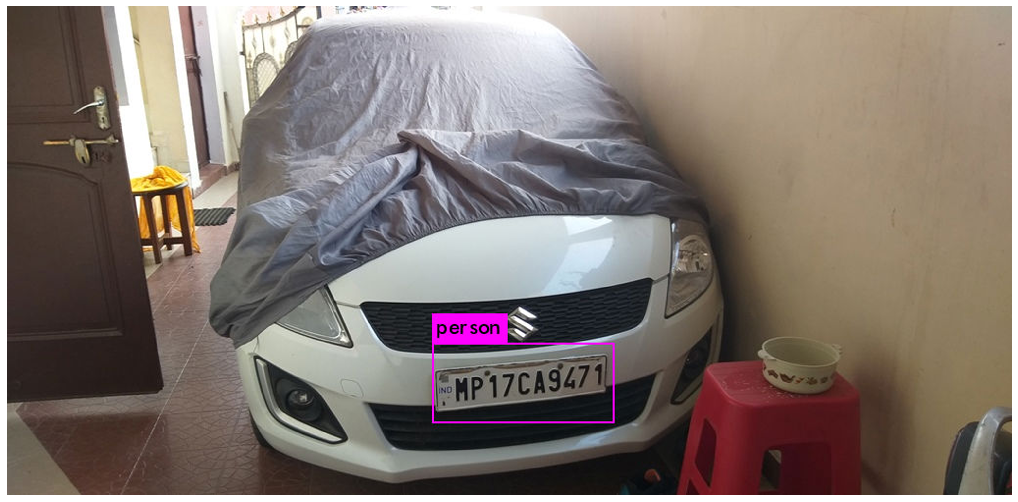

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)
  
  

imShow('predictions.jpg')

In [0]:
data

,frame_id,filename,objects
0,1,data/img2/0.jpg,[]
1,2,data/img2/1.jpg,[]
2,3,data/img2/10.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
3,4,data/img2/100.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
4,5,data/img2/101.jpg,[]
...,...,...,...
137,138,data/img2/95.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
138,139,data/img2/96.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
139,140,data/img2/97.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."
140,141,data/img2/98.jpg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."


In [0]:
!./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_output.weights -ext_output

 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    1

In [0]:
imshow('predictions.jpg')

NameError: ignored

In [0]:
!./darknet detect yolo-obj.cfg backup/yolo-obj_output.weights data/demo.jpg

 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    1

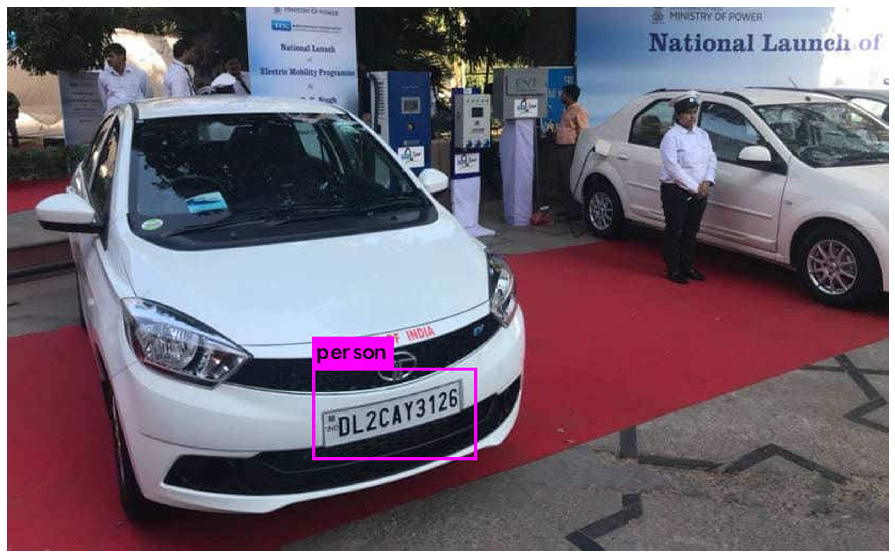

NameError: ignored

In [0]:
imShow('predictions.jpg')


In [0]:
#%cd content/drive/My Drive/darknet
!./darknet detect yolo-obj.cfg backup/yolo-obj_output.weights data/11.jpg

 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    1

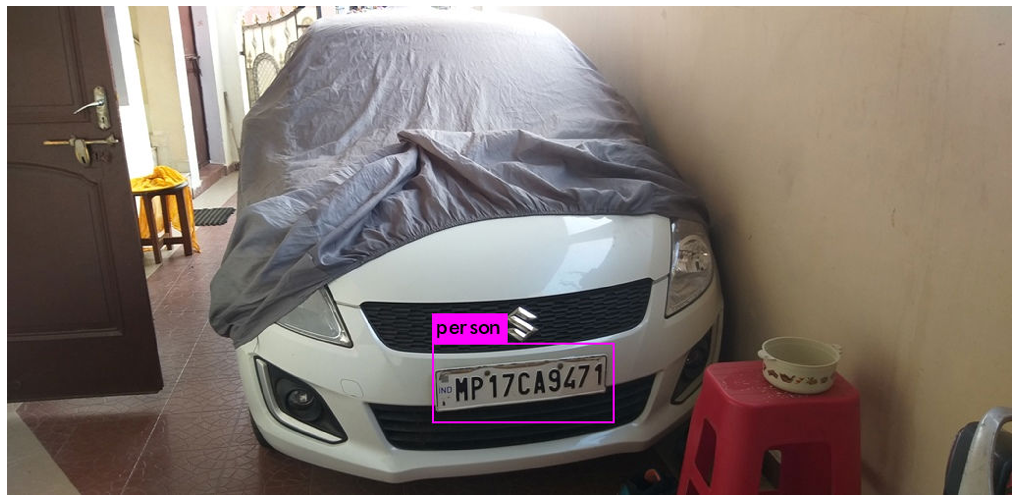

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)
  
  

imShow('predictions.jpg')

In [0]:
!./darknet detector demo data/obj.data yolo-obj.cfg backup/yolo-obj_output.weights  -dont_show data/demo.mp4 -i 0 -out_filename veout.avi

Demo
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!./darknet detector demo data/obj.data yolo-obj.cfg backup/yolo-obj_output.weights  -dont_show data/demo_3.mp4 -i 0 -out_filename Demo_3.avi

Demo
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2

In [7]:
!./darknet detector demo data/obj.data yolo-obj.cfg backup/yolo-obj_output.weights  -dont_show data/demo5.mp4 -i 0 -out_filename Demo5.avi

Demo
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2

In [1]:
import cv2
import detect as dt
from darknet import Darknet
from PIL import Image

vidcap = cv2.VideoCapture('content/drive/My\ drive/darknet/data/demo.mp4')
success, image = vidcap.read()
count = 0

m = Darknet('your/cfg/file/yolo-obj.cfg')
m.load_weights('weight/file/yolo-obj_output.weights')
use_cuda = 1
m.cuda()

while success:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(image)
    im_pil = im_pil.resize((m.width, m.height))
    boxes = dt.do_detect(m, im_pil, 0.5, 0.4, use_cuda)

    result = open('darknet/output/frame%04d.txt'%(count), 'w')
    for i in range(len(boxes)):
        result.write(boxes[i])
    count = count + 1
    success, image = vidcap.read()
    result.close()

ModuleNotFoundError: ignored